# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Jubayer Ahmed

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [146]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X,y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [147]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
forest = RandomForestRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
gradient = GradientBoostingRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
models = [tree, forest, gradient]
results = pd.DataFrame({"Training MSE": [0,0,0], "Validation MSE": [0,0,0]}, index=["DT", "RF", "GB"])

for i in range(len(models)):
    score = cross_validate(models[i], X_train, y_train, cv=5, 
                        scoring='neg_mean_squared_error',
                       return_train_score=True)
    results.loc[results.index[i], 'Training MSE'] = np.mean(score['train_score']) * -1
    results.loc[results.index[i], 'Validation MSE'] = np.mean(score['test_score']) * -1

print(results)
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

    Training MSE  Validation MSE
DT     47.279761       73.447331
RF     29.577455       45.059351
GB      3.379440       22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [148]:
# TO DO: ADD YOUR CODE HERE
result = pd.DataFrame({"Training Score": [0,0,0], "Validation Score": [0,0,0]}, index=["DT", "RF", "GB"])

for i in range(len(models)):
    score = cross_validate(models[i], X_train, y_train, cv=5, 
                        scoring='r2',
                       return_train_score=True)
    result.loc[result.index[i], 'Training Score'] = np.mean(score['train_score']) 
    result.loc[result.index[i], 'Validation Score'] = np.mean(score['test_score']) 

print(result)

    Training Score  Validation Score
DT        0.834465          0.738697
RF        0.896557          0.840927
GB        0.988171          0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*
1. All results from the trees above are better than the linear regression model which only produced ~0.6 for both validation and training. We can also see that the linear model produced higher MSE at 111 for training and 96 for validation. In the linear model, the training and validation MSE and r2 were basically the same while we do see some variance when looking at the tree models. This variance in the tree model is to be expected as we got much higher training score and we would not expect the validation score to increase linearly with the training score. Our goal is to get the peak of the validation curve before it starts to drop off again. Given the low scores in the linear model, we could say it produced high bias since it produced scores on the left side of the traning/variance curves.
2. I would pick the gradient boosting models as it has the highest training and validation scores. The decision tree seems to overfit as there is significant variance. It has the highest validaion MSE at 73 and lowest r2 score at 0.74. The Random Forest model did significantly better than the decision tree and it also produced lower variance. However, we can see that the gradient boosting produced even better results with 0.92 for r2 score and 23 for MSE.
3. We could try lowering the max depth. This will reduce the training score but may improve the validation score as the model complexity will decrease and be less fitted to the training data. We could also increase min_samples_split to decrease the number of splits which again reduces complexity but could potentially increase the validaiton score. For the RF model, we could increase the number of trees (n_estimator) and n_features to consider more features for each split. These would lead to higher training score. It is possible that it leads to overfit and validation start to drop if increased too much. In the gradient boosting model, we have very high training score and are observing some variance. It is possible that we would benefity from less complexity to reduce training and increase validation. In addition to tweaking n_estimator, we could decrease the learning rate to reduce the contribution of weak learner. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [149]:
# TO DO: Import wine dataset
import os
import requests

file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
file_name = file_url.split('/')[-1]

if not os.path.isfile(file_name):
    print('Downloading from {}'.format(file_url))
    r = requests.get(file_url)
    with open(file_name,'wb') as output_file:
        output_file.write(r.content)
    
data = pd.read_csv(file_name,                 
                   na_values='?', 
                   names=[ 'class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
                            'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity',
                            'Hue', '0D280_0D315_of_diluted_wines', 'Proline'])

y = data['class']
X = data.drop(columns=['class'])
print(X.size, type(X))
print(y.size, type(y))



2314 <class 'pandas.core.frame.DataFrame'>
178 <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [150]:
# TO DO: ADD YOUR CODE HERE
print(X.head())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [151]:
# TO DO: ADD YOUR CODE HERE
print(data.head().isnull().sum().sum())

0


How many samples do we have of each type of wine?

In [152]:
# TO DO: ADD YOUR CODE HERE
print(y.value_counts())

class
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [153]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

models = [tree, svm]
results = pd.DataFrame({"Training Score": [0,0], "Validation Score": [0,0]}, index=["DT", "SVC"])

for i in range(len(models)):
    score = cross_validate(models[i], X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)
    results.loc[results.index[i], 'Training Score'] = np.mean(score['train_score']) 
    results.loc[results.index[i], 'Validation Score'] = np.mean(score['test_score'])

print(results)

# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

     Training Score  Validation Score
DT         0.994357          0.894302
SVC        0.680427          0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [154]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix

y_pred = tree.predict(X_test)
mat = confusion_matrix(y_test, y_pred, labels=[1,2,3])
print(mat)

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


Text(170.97222222222223, 0.5, 'true value')

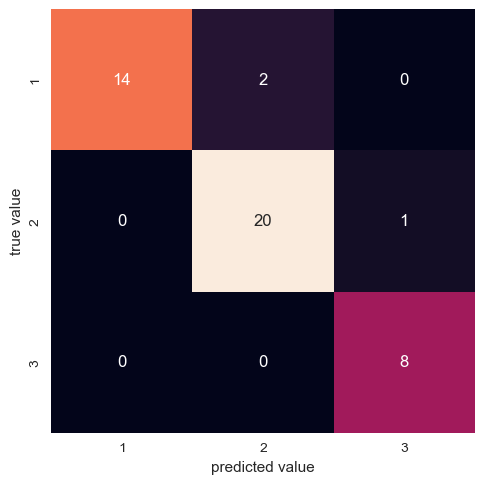

In [155]:
# TO DO: Print confusion matrix using a heatmap
sns.heatmap(mat, xticklabels=[1,2,3],  yticklabels=[1,2,3], square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [156]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=['1', '2', '3'],
                           zero_division=0))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*
1. The training and validation accuracry from the tree (0.99 training, 0.91 validation) were significantly better than the SVC model (0.68 training, 0.68 validation). The SVC model produced similar accuracy for both training and validation whereas there is some variance with the tree model. The training score is very high so it is possible that we are overfitting. We could possibly get better validation by reducing complexity (this would reduce the training score). We could reduce the max_depth or increase the samples required to split. 
2. The SVC did not work as well with the default parameters. We should increase C (increase regularization) to limit feature importance and we should increase gamma to increase the comlexity of the boundary. It is also possible that the default kernel (RBF) is not the best choice (for example if we have a linearly separable dataset).
3. Three as clearly shown by the confusion matrix. Two samples were predicted as class 2 while the true class was class 1 and one sample was classified as class 3 while the true class was class 2.
4. It depends on the scenario. Assuming that we want to classify wine properly to sell them (cost impact), we should priority precision since we want to charge the correct price most of the time or else the customer will not be happy and will be returning it. However if the collection of wine includes a particuarly rare expensive wine that we must predict correctly even if it comes at the detriment of incorectly classifying other wines (getting more false positive), then we can maximize recall.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I got my source code from the lecture and lab codes provided.
2. I did the code in order then did the discussion question in order.
3. I only used chatGPT to help me chose precision vs recall. It gave me some examples and I was able to extrapolate to my case. No code modifications were required. I used this prompt: how do i know if i should be maximizing precision or recall
4. I did not have any challenges because I reviewed all the material in depth before starting the assignment. I read the lecture notes and watched some youtube videos to clarify some concepts (specifically about SVM). I also reviewed all the jupiter notbooks. This allowed me to complete the assignment with minimal to no challenges.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*
In the classification report, I can clearly observe the trade off between precision and recall. For example, we can see that precision is 1 and recall is 0.88 for class 1 while it is basically the opposite for class 3 (0.89 precision, 1 recall) and somehwere in between for class 2. As discussed in class, precision and recall have an inverse trend as we simply do a swap of the type of mistakes we make (false positive vs false negative). Since the f1 score combines both , we see that it is relatively the same for all three classes. I also observed that the decision tree tends to overfit in all cases. For example it produced a 0.83 training and 0.74 validation for the load concrete while it got 0.99 training and 0.91 validation on the wine data. As discussed in class, this happens because they develop complex boundaries as it grows. When it reaches too much depth, the tree starts splitting on features that it should not. This is why it is better to use ensemble trees to introduce randomness to creates different trees and average out the results.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I like that assingment pushes us to interpret results rather than just trying to code. This is far more valuable as coding can be done by anyone (even using chatGPT's help if needed). The skill is in understanding the reulsts and I am glad the assignment focuses on that.
I did find the SVC part challenging as I did not understand it from the lectures. Running the code was easy but I had trouble understanding what the model does until I watched some Youtube videos. We went over it too quickly in the first lecture on the topic. The second lecture on the topic was better but I had already done the assignment by then. I found the SVM chapter very interesting. The concepts of mapping into infinite dimensions to separate data is genius.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [157]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(dual=True, max_iter=5000).fit(X_train, y_train)
models.append(linear_svm)
score = cross_validate(linear_svm, X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)
results.loc['LinearSVC', 'Training Score'] = np.mean(score['train_score']) 
results.loc['LinearSVC', 'Validation Score'] = np.mean(score['test_score']) 

print(results)


/Users/jubayerahmed/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jubayerahmed/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jubayerahmed/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jubayerahmed/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


           Training Score  Validation Score
DT               0.994357          0.894302
SVC              0.680427          0.676638
LinearSVC        0.928566          0.909972


/Users/jubayerahmed/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jubayerahmed/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*

Yes, the linear SVC is a good model for this data as it produced the best validation score with the least variance (0.93 trainting, 0.92 validation). This means that our data is linearly separable and explains why the SVC with RBF kernel (default kernel) was not able to produce similar results with default hyperparameters.